# SAMBa Induction Training: R Worksheet

This worksheet contains a few simple problems involving some basic methods in probability and statistics. You are expected to solve these problems using the programming language $\texttt{R}$.

The Central Limit Theorem states that the sum $Z = X_1 +...+ X_n$ of $n$ independent identically distributed (iid) random variables is approximately normally distributed for large $n$. In particular, if $X_1,... X_n$ have mean $\mu$ and variance $\sigma^2$, then the standardised sum $Z_s=((X_1-\mu) + ... + (X_n-\mu))/(\sqrt{n\sigma^2})$  has a standard normal distribution $N(0,1)$ for large $n$.

## Exercise: 1

Susie D gets many emails each day. Let $X_i \overset{\text{iid}}{\sim} Pois(70)$ for $i=1,...,n$ denote the number of emails she receives during day $i$.

Write a function `func` that takes n as input, generates a random sample $x$ of $n$ independent draws of $X_i$ and returns the sample mean and variance of $x$. You may find the function `rpois` and the following function structure helpful.

Write a function function `func2` that takes n as an input, makes a call to `func`, and uses both outputs of `func` to calculate an approximate standardised sum $Z_s$, and finally returns $Z_s$.

Use the function `sapply` with the first argument `rep(500,1000)` to generate $N = 1000$ such $Z_s$ for $n = 500$, saving the output to the variable `Zs_samples`. 

Iteratively generate another $N=1000$ samples for $Z_S$ for $n=500$ by implementing a `for` loop that calls `func2` during each iteration, and stores the result into a vector, `Zs_samples_loop`.

Plot a histogram of your samples of $Z_s$. What do you observe? Use the function `qqnorm` on your samples of $Z_s$ to produce a normal QQ plot. What do you observe and why is this the case?

## Solution+: 1

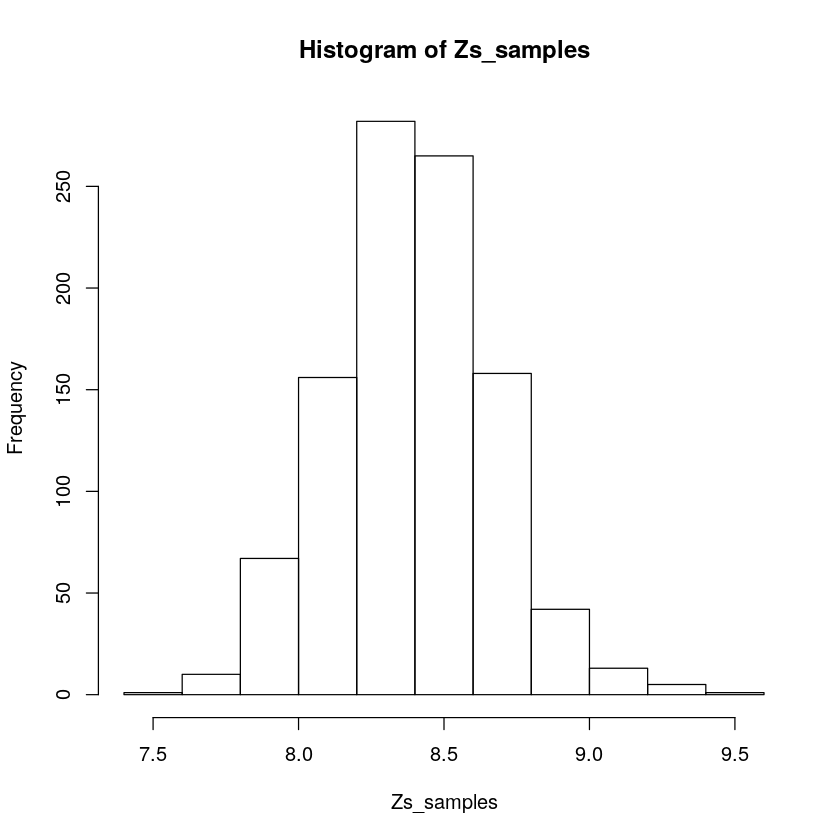

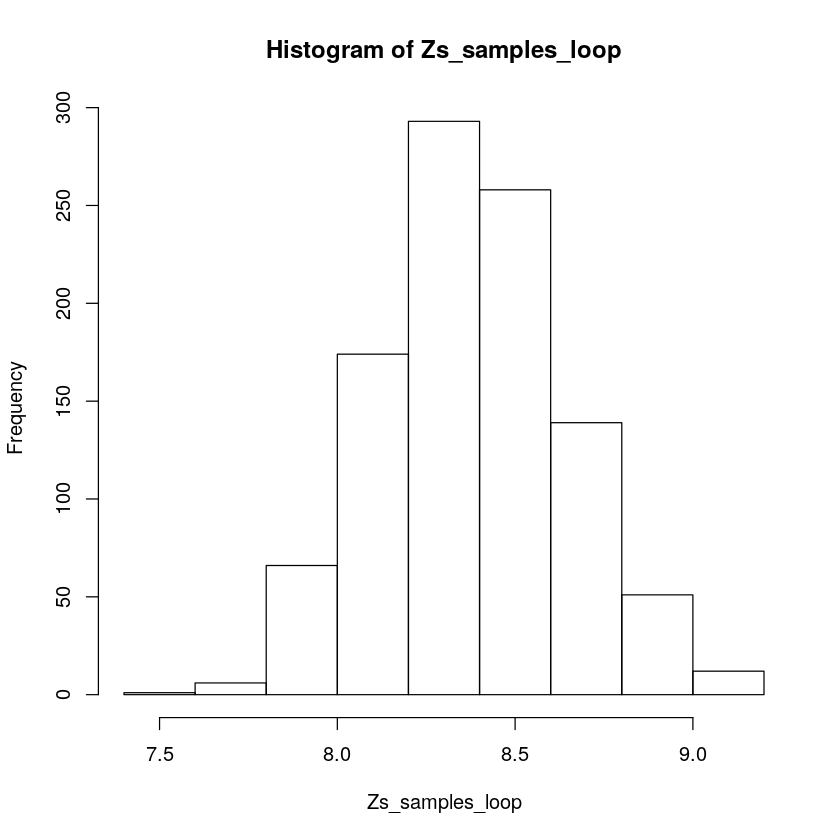

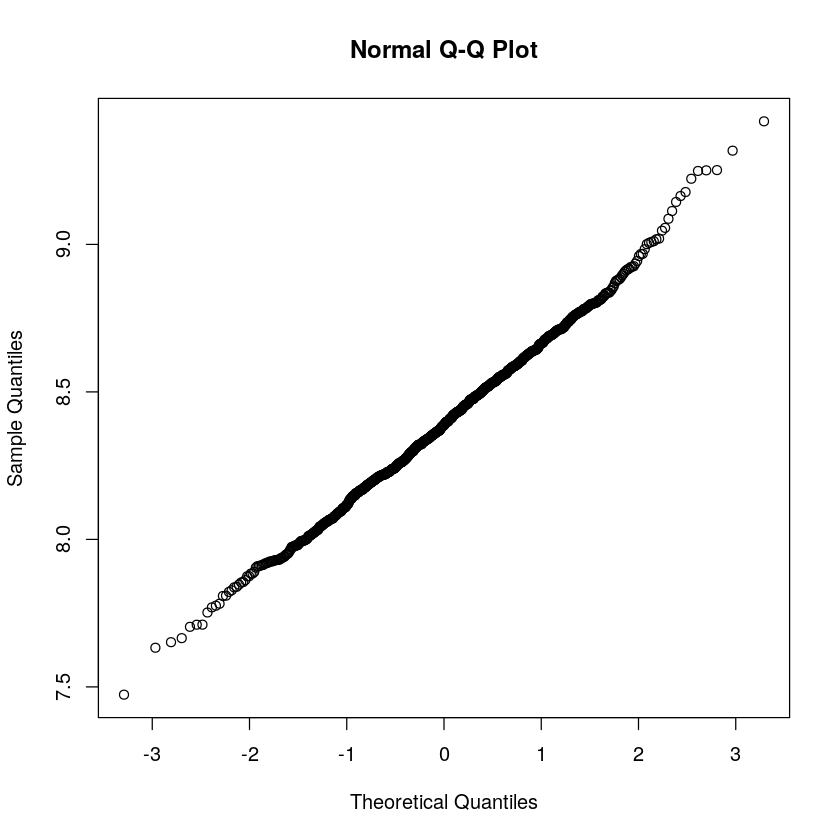

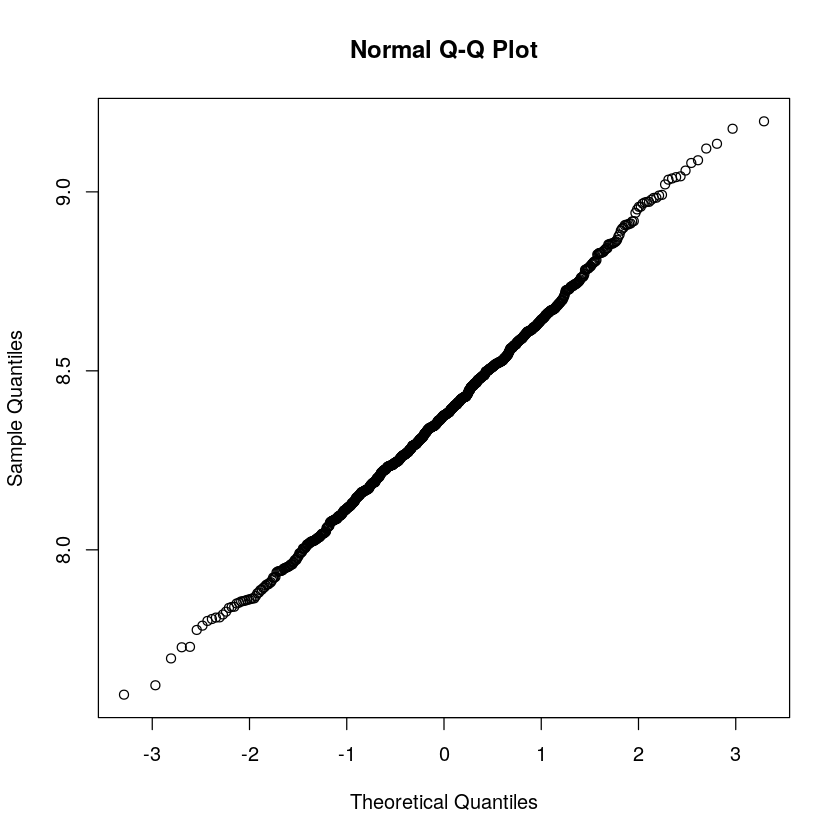

In [1]:
# A function to generate n iid X_i and return the sample mean and variance.
func<-function(n){
  x <-rpois(n,70)
    mean_x <-mean(x)
    var_x <-var(x)
    return(c(mean_x,var_x))
}

func2<-function(n){
  y=func(n)
  Z_s=y[1]/sqrt(y[2])
  Z_s
}

Zs_samples=sapply(rep(500,1000),func2)

Zs_samples_loop=rep(0,1000)
for (i in 1:1000){
    Zs_samples_loop[i] = func2(500)
}

hist(Zs_samples)
hist(Zs_samples_loop)
qqnorm(Zs_samples)
qqnorm(Zs_samples_loop)
#they are normally distributed as says the CLT.
#n=500 is sufficient for the sample variance to a good
#approximation to the true variance.

:Solution+

## Exercise: 2

Data in $\texttt{R}$ are usually stored in data frames. A data frame is a table in which each column is a vector containing the values of one variable. The variables can be of either numeric, factor or character type.

One of Andreas K's favourite built in datasets in R is called `trees`. Use the command `dat <- trees` to create a new data 
frame with this data. Have a play around with this dataset so that you are comfortable extracting a particular row or column. Use the following commands to perform some exploratory data analysis.

Fit a simple linear model with response variable `Volume` and predictor variable `Girth`, storing the results as an object `mod`.

Use `plot(mod)` and `summary(mod)` to assess the goodness of fit of the model. Does `Girth` predict `Volume` well?

From the formula for the volume of a cylinder, we may expect the variable `Girth`$^2$ to be a better predictor for `Volume`. Add this variable as a new column `Girth2` to the data frame dat.

Fit a linear model as before but with `Girth` replaced by `Girth2`. Did this improve the model?

## Solution+: 2

,Girth,Height,Volume
,<dbl>,<dbl>,<dbl>
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
5,10.7,81,18.8
6,10.8,83,19.7
7,11.0,66,15.6
8,11.0,75,18.2
9,11.1,80,22.6


     Girth           Height       Volume     
 Min.   : 8.30   Min.   :63   Min.   :10.20  
 1st Qu.:11.05   1st Qu.:72   1st Qu.:19.40  
 Median :12.90   Median :76   Median :24.20  
 Mean   :13.25   Mean   :76   Mean   :30.17  
 3rd Qu.:15.25   3rd Qu.:80   3rd Qu.:37.30  
 Max.   :20.60   Max.   :87   Max.   :77.00  

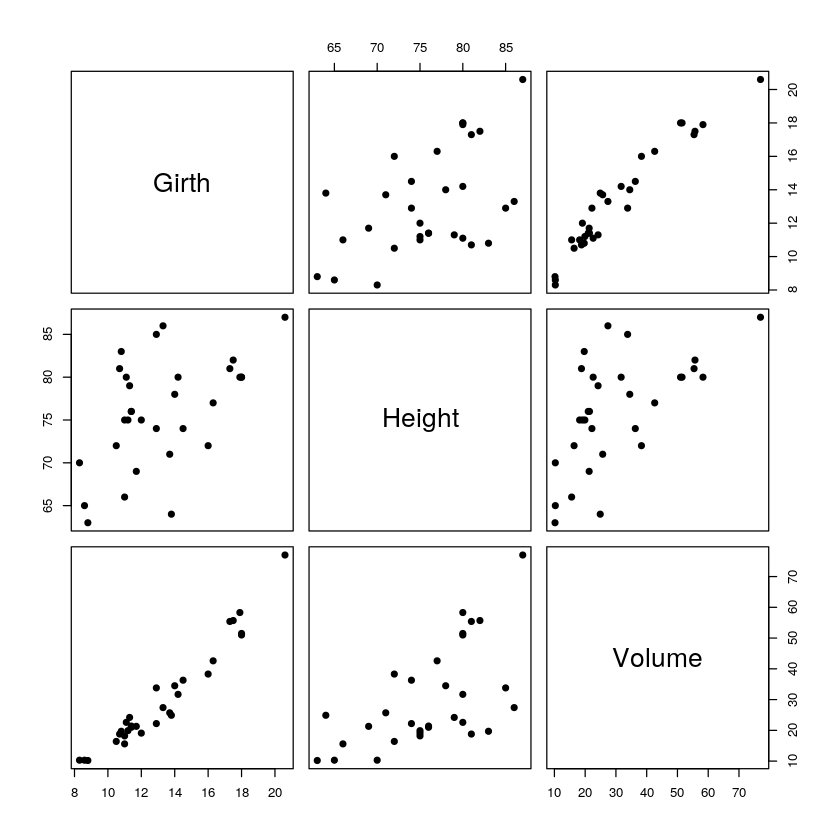

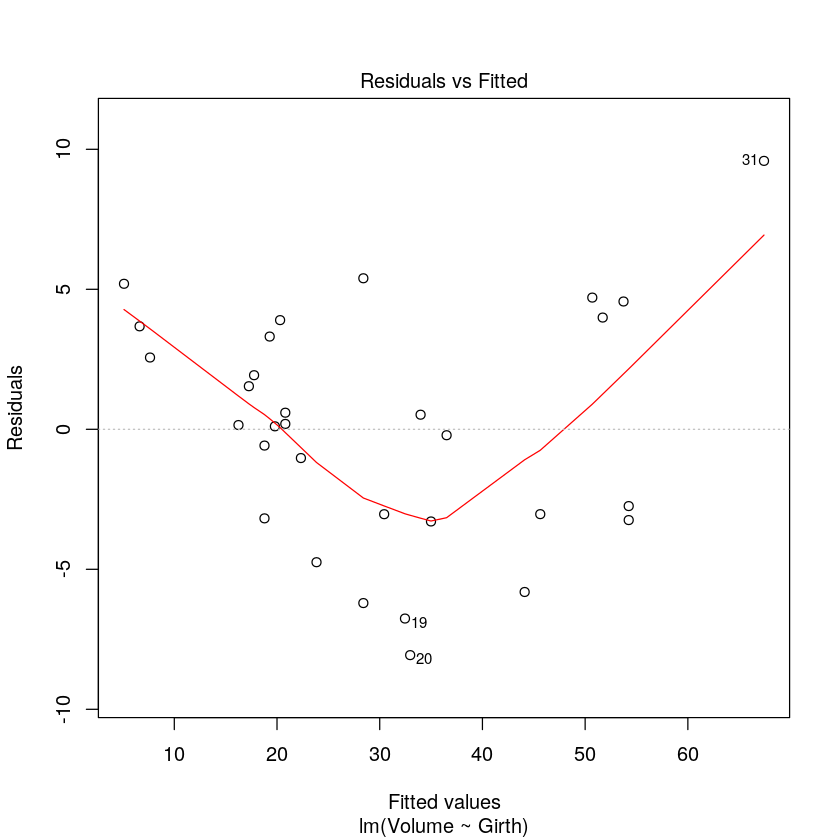

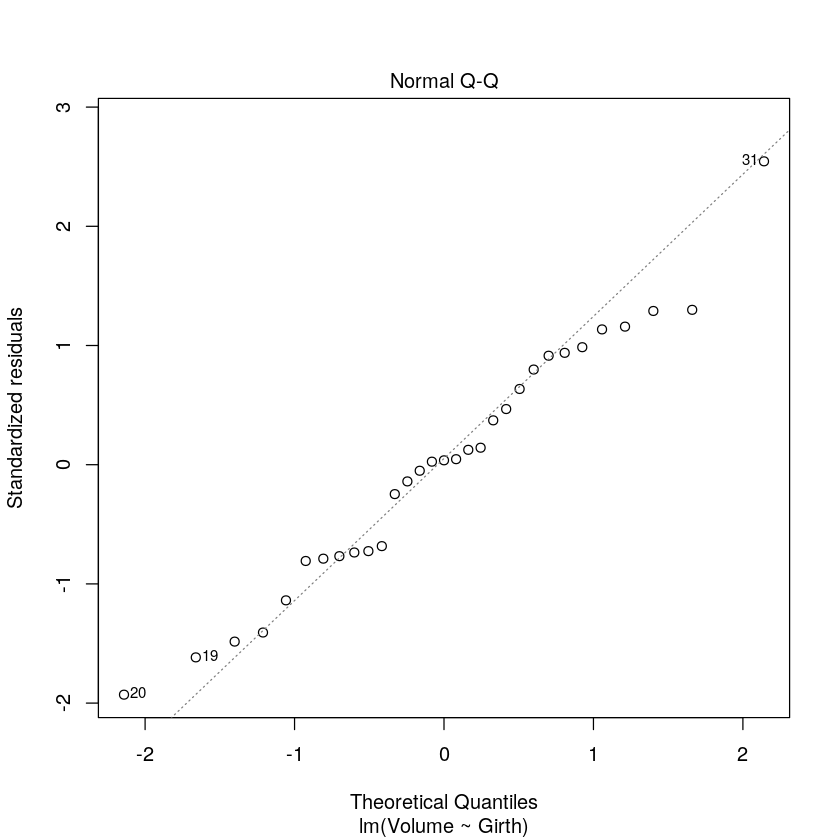

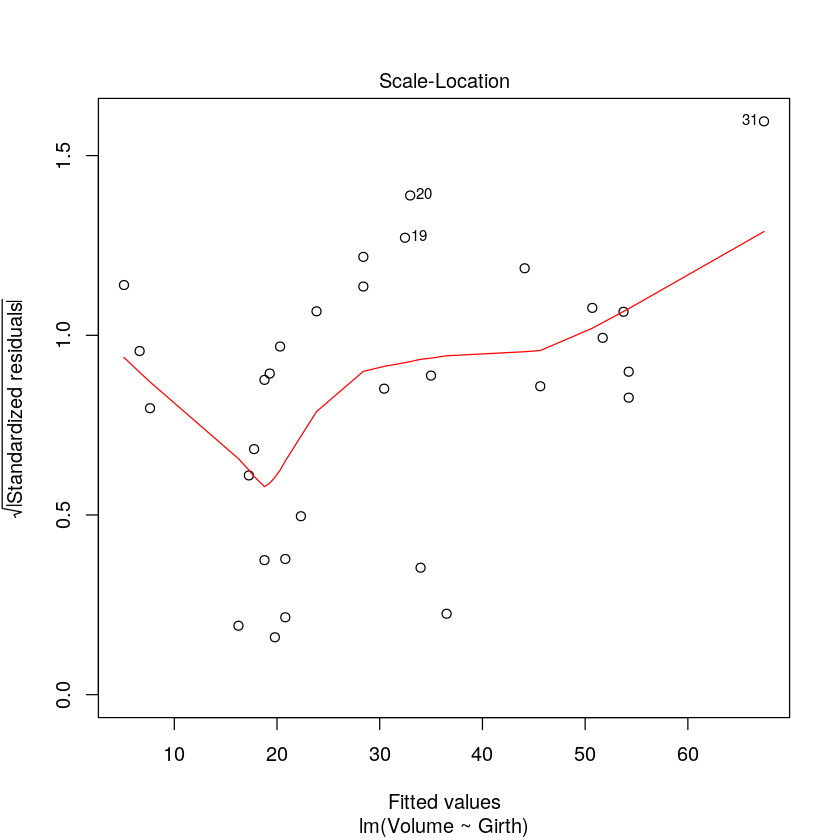


Call:
lm(formula = Volume ~ Girth, data = dat)

Residuals:
   Min     1Q Median     3Q    Max 
-8.065 -3.107  0.152  3.495  9.587 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -36.9435     3.3651  -10.98 7.62e-12 ***
Girth         5.0659     0.2474   20.48  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.252 on 29 degrees of freedom
Multiple R-squared:  0.9353,	Adjusted R-squared:  0.9331 
F-statistic: 419.4 on 1 and 29 DF,  p-value: < 2.2e-16



Call:
lm(formula = Volume ~ Girth2, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2475 -2.5738  0.2556  2.1341  7.0061 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.355142   1.416902  -2.368   0.0248 *  
Girth2       0.181173   0.006923  26.169   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.37 on 29 degrees of freedom
Multiple R-squared:  0.9594,	Adjusted R-squared:  0.958 
F-statistic: 684.8 on 1 and 29 DF,  p-value: < 2.2e-16


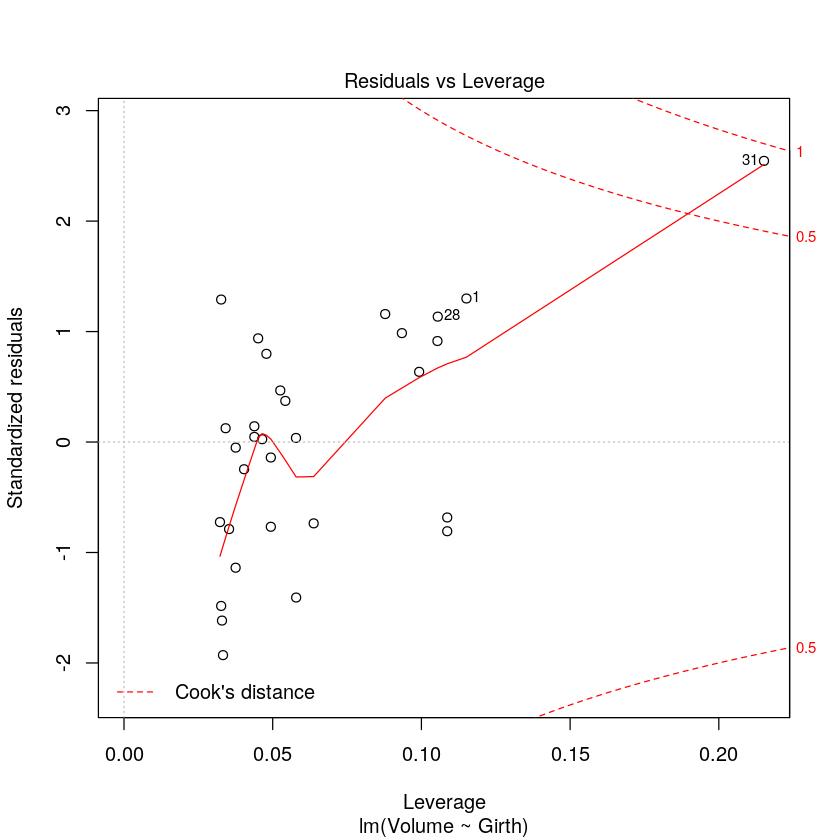

In [2]:
dat <- trees #let dat be the trees dataframe
dat[1:10,] #print the first 10 rows
summary(dat) #print a summary of the dataset
pairs(dat,pch=19) #plot a matrix of scatterplots

mod=lm(Volume~Girth,data=dat)

plot(mod)
summary(mod)

dat$Girth2 <- (dat$Girth)^2 #note numerical operations are performed elementwise in R.

mod2=lm(Volume~Girth2,data=dat)
summary(mod2)
#improves- F-statistic increases, Residual se decreases etc

:Solution+

## Exercise: 3 (Bonus - this is more a test of your Statistics intuition)

When Paul M was a child he sold newspapers at a kiosk. In the morning he bought newspapers at 25 Pesos each, but after the first 200 newspapers the price falls to 5 Pesos each. He sells the newspapers at 100 Pesos each. If any remain unsold at the end of the day, he gets no refund. From previous experiences, he infers the demand for newspapers each day is distributed according to a $N(178,21^2)$ distribution. He would like to know what the optimal number of newspapers to buy each day was.

Let $n$ be the number of papers Paul M buys each day. Write functions the following functions:

`cost(n)` to give the cost of buying $n$ papers,

`profit(n,d)` to give the profit from sales when there is demand for $d$ papers and Paul M bought $n$ papers, and

`average.profit(n,nreps)` to simulate `nreps` values of demands $d\sim N(178,21^2)$ and return the average profit for these cases.

Use `average.profit` to work out the optimal number of newspapers Paul M should buy each day.

You may find it helpful to use a small number of simulations initially, then increase this number to get accurate reuslts as your search closes in on the optimal value. Careful- a local maximum may not be a global maximum! Make sure to let Paul M know what you discover.

Can you think of a more efficient way to get the answer? Hint: investigate the `set.seed` function.

## Solution+: 3 (Bonus - this is more a test of your Statistics intuition)

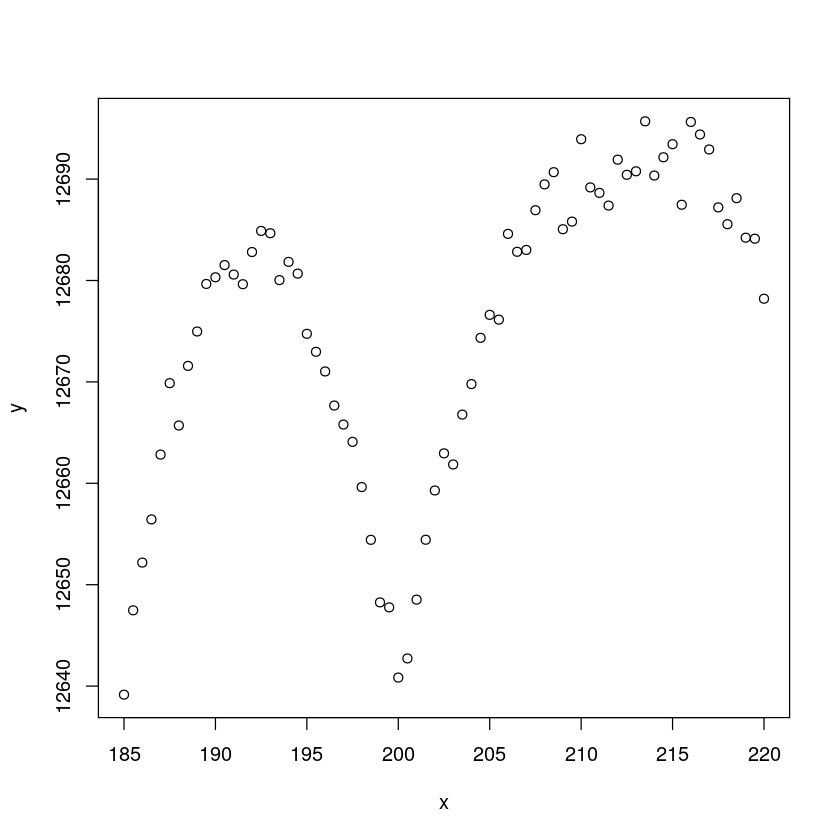

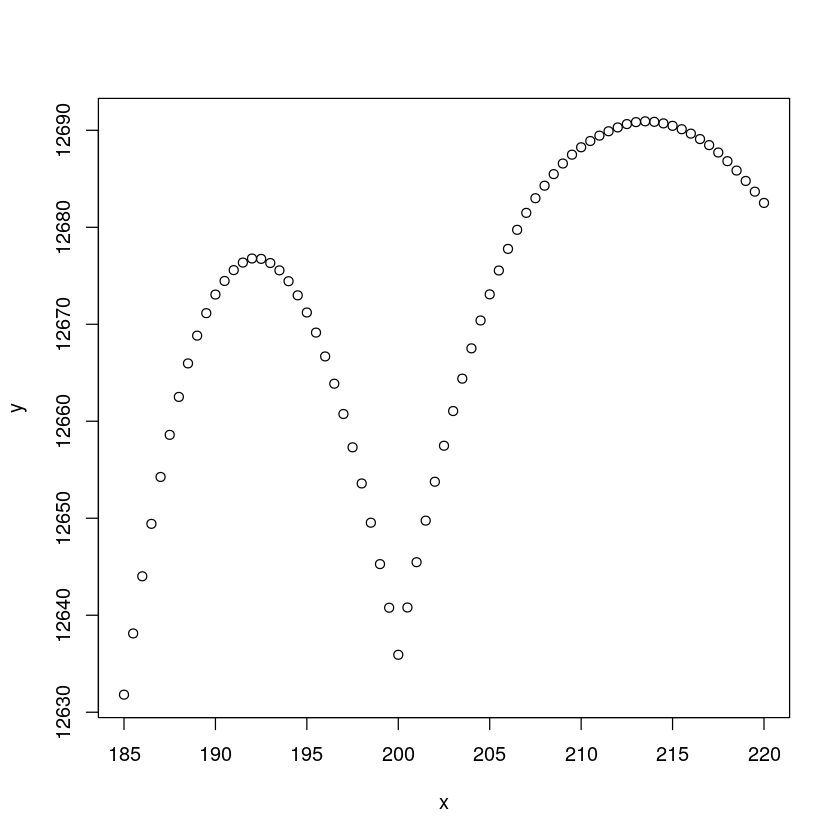

In [3]:
cost <- function(n){
  min(200,n)*25+(n>200)*(n-200)*5
}
profit <- function(n,d){
  100*min(n,d)-cost(n)
}
average.profit <- function(n,nreps){
  demand_vec <- rnorm(nreps,178,21)# note that the 3rd argurment of rnorm in R is sd not variance!
    profit_vec <- sapply(demand_vec,profit,n=n) #alternatively you may use a for loop. But sapply is a neat way to do things in R.
  av_profit <- mean(profit_vec)
    return(av_profit)
}

#after some initial searching with small nreps, we find the maximum is in the interval (185,220)
x=seq(from=185,to=220,by=0.5)
y=sapply(x,average.profit,nreps=500000) #takes a minute
plot(x,y)
#global maximum is 214

#use set.seed to set the seed for each new n in order to couple the estimates
average.profit <- function(n,nreps){
  set.seed(100)
  demand_vec <- rnorm(nreps,178,21)# note that the 3rd argurment of rnorm in R is sd not variance!
    profit_vec <- sapply(demand_vec,profit,n=n) #alternatively you may use a for loop. But sapply is a neat way to do things in R.
  av_profit <- mean(profit_vec)
    return(av_profit)
}

x=seq(from=185,to=220,by=0.5)
y=sapply(x,average.profit,nreps=3000) #takes a second
plot(x,y)

:Solution+